In [306]:
# Bibliotecas necesarias para desarrollar el problema
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
from sympy import Derivative
from lagrange_a_hamilton import cambio_L_H

# Sistema de referencia

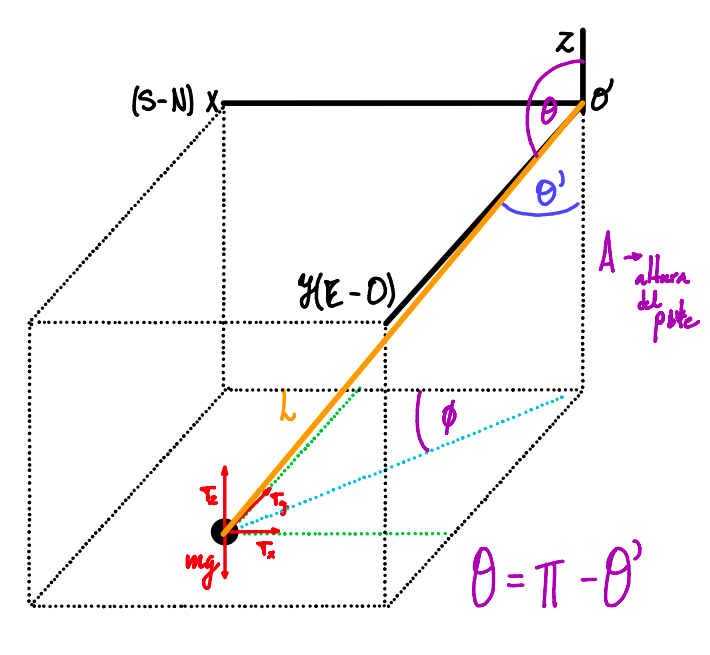                        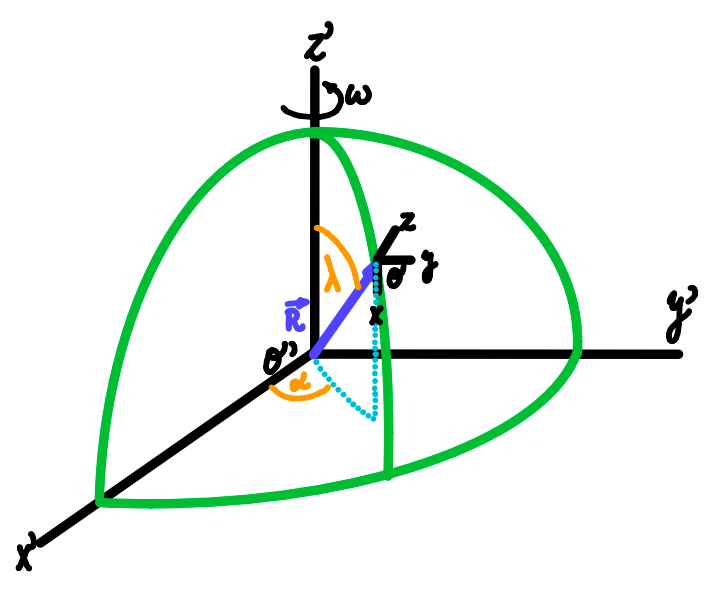



# Designacion de las constantes y varibles dinamicas del sistema

In [307]:
omega, m, g, L, A , ladmda, R_T , k , a , c_w , p , eta = smp.symbols(r"\omega , m , g, L , A , \lambda , R_{Tierra}, k , a, c_w , \rho_{aire}, \eta_{aire}")

# omega: velocidad de rotacion de la Tierra
# m:  masa del pendulo
# g: constante de gravitacional
# L: Longitud natural de la barra
# A: Altura del pivote del pendulo
# ladmda: Colatitud 
# R_T: Radio terrestre
# k : Constante de resorte de la barra semirigida
# a : Radio de la esfera del pendulo
# c_w: Coeficiente de resistencia cuadratica
# p: Densidad del aire
# eta: Viscosidad del aire

alpha = smp.Rational(3,2)*smp.pi*a*eta
beta = smp.Rational(1,2)*c_w*a**2 *p

# Variables dinamicas

from sympy.physics.mechanics import dynamicsymbols , init_vprinting # Se utilizan estas funciones para tener notacion de Newton para las derivadas temporales y se generan 
                                                                    # las funciones con dependencia implicita a t

init_vprinting()

t = smp.Symbol("t", positive = True) # Tiempo
r , theta , phi = dynamicsymbols(r"r , \theta , \phi") 


# Cabe destacar que por el sistema de referencia utilizado, theta va a ser cambiado segun la transformacion: theta = pi - theta' 
# Donde sera theta' la variable dinamica que se utilizara al final

En el sistema de referencia no inercial (Imagen de la izquierda), la segunda ley de Newton corresponde a:

\begin{align*}
    \sum \vec{F} = m \ddot{\vec{r}} \Rightarrow \vec{w} - \alpha \dot{\vec{r}} - \beta \left| \dot{\vec{r}} \right| \dot{\vec{r}} - k (\vec{r} - \vec{L}) - 2 m \vec{w} \times \dot{\vec{r}} - m \vec{w} \times \left[ \vec{w} \times (\vec{r} + \vec{R}) \right] = m \ddot{r}
\end{align*}

Con: 

$\bullet$ Fuerzas, otros vectores y constantes del sistema:

\begin{align*}
    \vec{w} = -mg \hat{k}  \; \; \;\; & \;\;\;\;\; \vec{R} = \left(R_{Tierra} + A\right)\hat{k}  &  \alpha = \frac{3 \pi a \eta_{aire}}{2} \;\;\;\; & \;\;\;\; \beta = \frac{c_{w} \pi a^{2} \rho_{aire}}{2}   \; \; \;\; & \;\;\;\;\; \vec{L} = L  \hat{e_r}
\end{align*}

No obstante, se va a utilizar el Lagrangiano del sistema como paso intermedio de la Mecánica Hamiltoneana, con el objetivo de obtener un sistema de ecuaciones diferenciales de primer orden. Cabe destacar, que la mecánica Lagrangiana ni la Hamiltoneana consideran fuerzas no conservativas de forma natural, porque que será necesario construir estas fuerzas como fuerzas generalizadas y hacer la introducción de estas.

$\bullet$ Lagrangiano del sistema:
\begin{equation*}
    L = T - V 
    = \frac{1}{2}m \dot{\vec{r}}^2 - mg\vec{r}\cdot \hat{k} -  \frac{1}{2} k (\vec{r} -\vec{L})^2
\end{equation*}

$\bullet$ Fuerzas generalizadas:
\begin{equation*}
    Q_j =\vec{F} \cdot \frac{\partial \vec{r}}{\partial q_j}
\end{equation*}

donde $\vec{F}$ serían todas las fuerzas no conservativas del sistema

$\bullet$ Posición en coordenadas esféricas del marco no inercial:
\begin{equation*}
    \vec{r'} = r' \hat{e_r}
\end{equation*}

$\bullet$ Velocidad en coordenadas esféricas del marco no inercial:
\begin{equation*}
    \dot{\vec{r'}} = \dot{r'} \hat{e_r} + r' \dot{\theta} \hat{e_\theta} + r' \dot{\phi} sin\left(\theta\right) \hat{e_\phi}
\end{equation*}

$\bullet$ Velocidad angular de la Tierra en el marco de referencia de la Figura de la derecha:
\begin{equation*}
    \vec{\omega} = \omega cos \left(\lambda\right) \hat{k} - \omega sin \left(\lambda\right) \hat{i}
\end{equation*}

$\bullet$ Relación de la derivada temporal entre marcos de referencia inerciales y no inerciales:

\begin{equation*}
    \frac{d}{dt}\vec{A} _{fijo} = \frac{d}{dt}\vec{A} _{rot} + \vec{\Omega} \times \vec{A}
\end{equation*}

$\bullet$ Matriz de transformación de coordenadas cartesianas a esféricas:
\begin{equation*}
    S = \begin{pmatrix}
        sin\left(\theta\right) cos\left(\phi\right) & sin\left(\theta\right) sin\left(\phi\right) & cos \left(\theta\right)\\ 
        cos\left(\theta\right) cos\left(\phi\right) & cos\left(\theta\right) sin\left(\phi\right) & -sin\left(\theta\right)\\ 
        -sin\left(\phi\right) & cos\left(\phi\right) & 0
        \end{pmatrix}
\end{equation*}

# Definiendo el sistema

Se va a utilizar un sistema matricial de vectores manteniendo siempre un orden:

Cartesianas -> ($\hat{i}$ , $\hat{j}$ , $\hat{k}$) \
Esfericas -> ($\hat{e}_r$ ,  $\hat{e}_\theta$ ,  $\hat{e}_\phi$) 

In [308]:
# Vectores en cartesianas

R = smp.Matrix([0,0,R_T + A]) # Vector posicion para el pivote del pendulo
wp = smp.Matrix([0,0,-m*g]) # Vector peso
wr = smp.Matrix([-omega*smp.sin(ladmda),0,omega*smp.cos(ladmda)]) # Vector velocidad de rotacion terrestre

# Matriz de transformacion de cartesianas a esfericas

S = smp.Matrix(([smp.sin(theta)*smp.cos(phi), smp.sin(theta)*smp.sin(phi), smp.cos(theta)],
                [smp.cos(theta)*smp.cos(phi), smp.cos(theta)*smp.sin(phi), -1*smp.sin(theta)],
                [-1*smp.sin(phi), smp.cos(phi),0]))

# Transformando los vectores de a coordenadas esfericas

R = S*R
wp = S*wp
wr = S*wr # Los vectores fueron transformados y su version en cartesianas se perdio

# Vector longitud natural

vL = smp.Matrix([L,0,0])

# Ahora, escribiendo los vectores que ya se establecieron en coordenadas esfericas (posicion , velocidad y aceleracion)

vr = smp.Matrix([r,0,0])

# Derivadas temporales (primera y segunda) de las coordenadas

dr = smp.diff(r)
ddr = smp.diff(dr)

dtheta = smp.diff(theta)
ddtheta = smp.diff(dtheta)

dphi = smp.diff(phi)
ddphi = smp.diff(dphi)


dvr = smp.Matrix([dr , r*dtheta , r*dphi*smp.sin(theta)]) # Velocidad



Aplicando la relación de la derivada temporal entre marcos de referencia inerciales y no inerciales para el vector posición del péndulo


\begin{align*}
    \vec{r} &= \vec{R} + \vec{ r'} \\
    \dot{\vec{r}}_{fijo} &= \dot{\vec{R}}_{fijo} + \dot{\vec{ r'}}_{fijo} \\
                  &= \dot{\vec{R}}_{fijo} + \dot{\vec{r'}}_{rot}+ \vec{\omega} \times \vec{ r'}
\end{align*}

Con el resultado de lo anterior, buscando la energía cinética

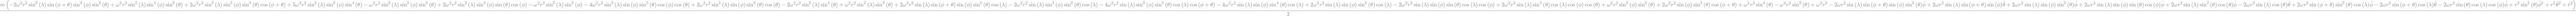

In [309]:
vec_rp = smp.Matrix([r*smp.sin(theta)*smp.cos(phi),r*smp.sin(theta)*smp.sin(phi), r*smp.cos(theta)])

vec_v = smp.diff(R,t) + smp.diff(vec_rp) +wr.cross(vec_rp)

velocidad_c = vec_v.dot(vec_v).expand()
velocidad_c = velocidad_c.simplify()


T = smp.Rational(1,2)*m*velocidad_c
T

La energía potencial

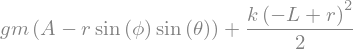

In [310]:
V = m*g*(A-r*smp.sin(theta)*smp.sin(phi)) + smp.Rational(1,2)*k*(r-L)**2
V

El Lagrangiano y el Hamiltoneano

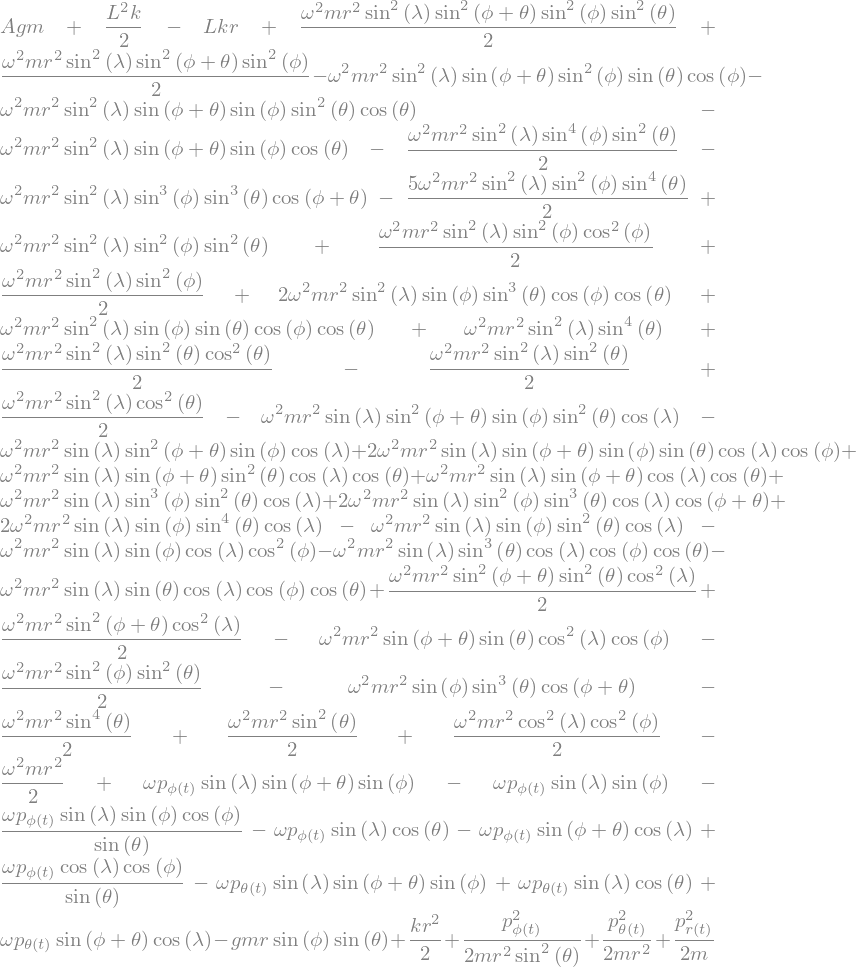

In [311]:
LL = T - V
cg = [r,theta,phi]
H , sp , p_cg = cambio_L_H(LL, cg)
# H = H.subs([(theta, smp.pi-theta)]).evalf()
H

# Ecuaciones del moviento

In [312]:
pr , ptheta , pphi = sp

dpr = -1*smp.diff(H,r)
dr = smp.diff(H,pr)

dptheta = -1*smp.diff(H,theta)
dtheta = smp.diff(H,ptheta)

dpphi = -1*smp.diff(H,phi)
dphi = smp.diff(H,pphi)

# Conversión de ecuaciones simbólicas a ecuaciones numéricas

In [313]:
# m,ladmda,omega,A,R_T,L,g , t,r,pr,theta,ptheta,phi,pphi

dpr_n = smp.lambdify([m,ladmda,omega,A,R_T,L,k,g , t,r,pr,theta,ptheta,phi,pphi], dpr, 'numpy')
dr_n = smp.lambdify([m,ladmda,omega,A,R_T,L,k,g , t,r,pr,theta,ptheta,phi,pphi], dr, 'numpy')

dptheta_n = smp.lambdify([m,ladmda,omega,A,R_T,L,k,g , t,r,pr,theta,ptheta,phi,pphi], dptheta, 'numpy')
dtheta_n = smp.lambdify([m,ladmda,omega,A,R_T,L,k,g , t,r,pr,theta,ptheta,phi,pphi], dtheta, 'numpy')

dpphi_n = smp.lambdify([m,ladmda,omega,A,R_T,L,k,g , t,r,pr,theta,ptheta,phi,pphi], dpphi, 'numpy')
dphi_n = smp.lambdify([m,ladmda,omega,A,R_T,L,k,g , t,r,pr,theta,ptheta,phi,pphi], dphi, 'numpy')

# A partir de aqui se resuelven las ecuaciones con los algoritmos presenten en scipy

## Se genera la función auxiliar para resolver el sistema de ecuaciones diferenciales

In [314]:
def dSdt(t_n,S, m_n, lamdba_n, omega_n, A_n, R_T_n, L_n,k_n, g_n):
    [r_n,
    pr_n, 
    theta_n,
    ptheta_n, 
    phi_n,
    pphi_n] = S
    return [dr_n(m_n,lamdba_n,omega_n,A_n,R_T_n,L_n,k_n,g_n , t_n,r_n,pr_n,theta_n,ptheta_n,phi_n,pphi_n),
            dpr_n(m_n,lamdba_n,omega_n,A_n,R_T_n,L_n,k_n,g_n , t_n,r_n,pr_n,theta_n,ptheta_n,phi_n,pphi_n), 
            dtheta_n(m_n,lamdba_n,omega_n,A_n,R_T_n,L_n,k_n,g_n , t_n,r_n,pr_n,theta_n,ptheta_n,phi_n,pphi_n),
            dptheta_n(m_n,lamdba_n,omega_n,A_n,R_T_n,L_n,k_n,g_n , t_n,r_n,pr_n,theta_n,ptheta_n,phi_n,pphi_n) , 
            dphi_n(m_n,lamdba_n,omega_n,A_n,R_T_n,L_n,k_n,g_n , t_n,r_n,pr_n,theta_n,ptheta_n,phi_n,pphi_n),
            dpphi_n(m_n,lamdba_n,omega_n,A_n,R_T_n,L_n,k_n,g_n , t_n,r_n,pr_n,theta_n,ptheta_n,phi_n,pphi_n)]

# Definición de las condiciones iniciales y las demás constantes del sistema

In [315]:
# Constantes
omega_n = 7.27e-5
m_n = 1000
g_n = 9.80665
L_n = 100
A_n = 20
lamdba_n = -0.1807
R_T_n = 6.37e6
k_n = 10
a_n = 100
cw_n = 50
p_n = 100
#p_n = 1.225
eta_n = 18.6e-6


# Condiciones iniciales
r0 = 100
theta0 = np.pi/4 +np.pi
phi0 = 0.0
vr0 = 0.0
vtheta0 = 0.0
vphi0 = 0.0

condiciones_iniciales = [r0,vr0, theta0,vtheta0 , phi0 ,vphi0]
extra_arg = (m_n,lamdba_n,omega_n,A_n,R_T_n,L_n,k_n,g_n)

# Resolución del sistema

In [316]:
from scipy.integrate import solve_ivp

t0 = 0
tf = 500
paso = tf*10

tt = np.linspace(t0,tf,paso)

sol = solve_ivp(dSdt,t_span=(t0,tf),t_eval=tt,y0 = condiciones_iniciales , args= extra_arg, method="RK45")

rr = sol.y[0]
ttheta = sol.y[2]
pphi = sol.y[4]

# De nuevo  a cartesianas

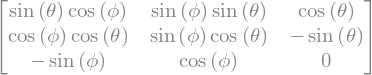

In [317]:
S

In [318]:
x = rr*np.cos(pphi)*np.sin(ttheta)
y = rr*np.sin(pphi)*np.sin(ttheta)
z = rr*np.cos(ttheta)

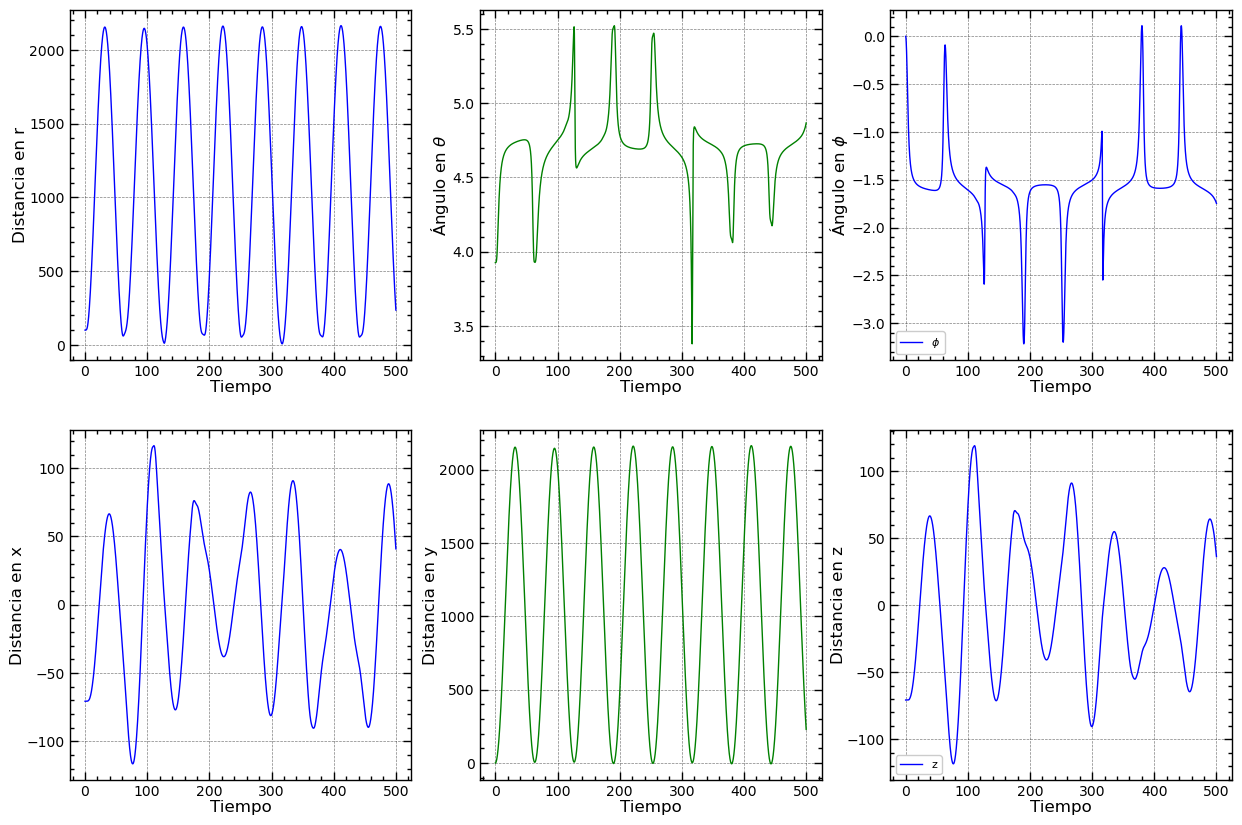

In [319]:
import scienceplots
plt.style.use(["science", "notebook" , "grid"])

fig, axes = plt.subplots(2,3, figsize = (15,10))
# los primeros argumentos del subplots() reflejan el numero de fijas y columnas de una "matriz" (por decirlo de alguna forma)
# donde cada entrada es una grafica individual



# PRIMERA GRAFICA
ax1 = axes[0][0] # Nos colocamos en la primera grafica, exactamente como si fuera una matriza de python
ax1.plot(tt, rr, "-", color= "blue", lw=1, ms = 3, label = r"r")

ax1.tick_params(axis = "both", labelsize = 10) # Para cambiar el tamano de la numeracion de los ejes


# EJE X
ax1.set_xlabel("Tiempo", labelpad = 1,fontsize = 12)


# EJE Y
ax1.set_ylabel("Distancia en r",labelpad = 1, fontsize = 12)


# SEGUNDA GRAFICA
ax2 = axes[0][1]
ax2.plot(tt,ttheta, "-", color= "green", lw=1, ms = 3, label = r"$\theta$")

ax2.tick_params(axis = "both", labelsize = 10)

# EJE X
ax2.set_xlabel("Tiempo", labelpad = 1,fontsize = 12)


# EJE Y
ax2.set_ylabel(r"Ángulo en $\theta$", labelpad = 1,fontsize = 12)


# TERCERA GRAFICA

ax3 = axes[0][2]
ax3.plot(tt, pphi, "-", color= "blue", lw=1, ms = 3, label = r"$\phi$")


ax3.tick_params(axis = "both", labelsize = 10)

ax3.legend(loc = 'lower left',fontsize = 8, ncol = 2)

# EJE X
ax3.set_xlabel("Tiempo", labelpad = 1,fontsize = 12)


# EJE Y
ax3.set_ylabel(r"Ángulo en $\phi$", labelpad = 1,fontsize = 12)


# CUARTA GRAFICA
ax4 = axes[1][0] # Nos colocamos en la primera grafica, exactamente como si fuera una matriza de python
ax4.plot(tt, x, "-", color= "blue", lw=1, ms = 3, label = r"x")

ax4.tick_params(axis = "both", labelsize = 10) # Para cambiar el tamano de la numeracion de los ejes


# EJE X
ax4.set_xlabel("Tiempo", labelpad = 1,fontsize = 12)


# EJE Y
ax4.set_ylabel("Distancia en x",labelpad = 1, fontsize = 12)


# Quinta GRAFICA
ax5 = axes[1][1]
ax5.plot(tt,y, "-", color= "green", lw=1, ms = 3, label = r"y")

ax5.tick_params(axis = "both", labelsize = 10)

# EJE X
ax5.set_xlabel("Tiempo", labelpad = 1,fontsize = 12)


# EJE Y
ax5.set_ylabel(r"Distancia en y", labelpad = 1,fontsize = 12)


# SEXTA GRAFICA

ax6 = axes[1][2]
ax6.plot(tt, z, "-", color= "blue", lw=1, ms = 3, label = r"z")


ax6.tick_params(axis = "both", labelsize = 10)

ax6.legend(loc = 'lower left',fontsize = 8, ncol = 2)

# EJE X
ax6.set_xlabel("Tiempo", labelpad = 1,fontsize = 12)


# EJE Y
ax6.set_ylabel(r"Distancia en z", labelpad = 1,fontsize = 12)

plt.style.use(["default"])

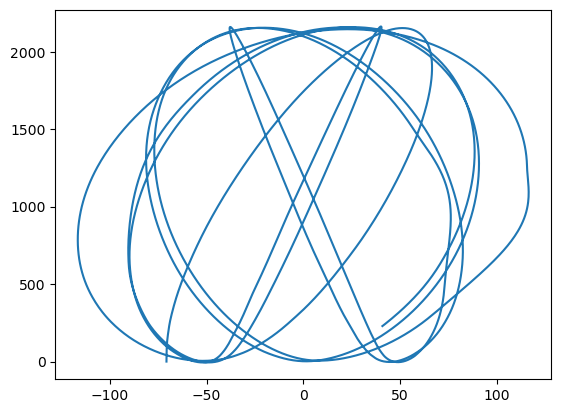

In [320]:
fig, ax = plt.subplots()

ax.plot(x,y)

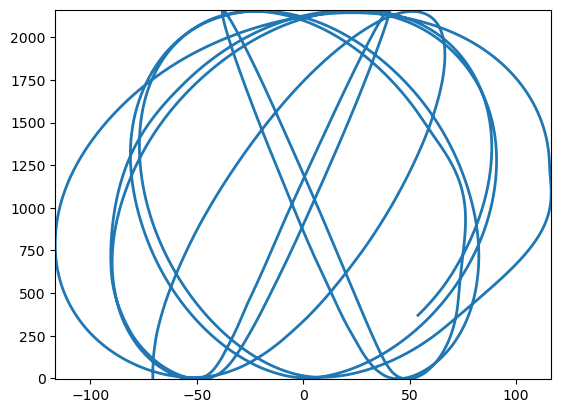

In [322]:
from matplotlib.animation import FuncAnimation

# Suponiendo que tienes x y y como listas o arrays de posiciones
# Configurar la figura y los ejes
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)  # Inicializar la gráfica vacía

# Establecer los límites del gráfico (opcional, según los datos)
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))

# Factor de salto de frames para aumentar la velocidad
step =20  # Por ejemplo, para saltar de 5 en 5 frames

# Función de inicialización para configurar la línea vacía al principio
def init():
    line.set_data([], [])
    return line,

# Función de actualización para la animación
def update(frame):
    # Usar el frame actual multiplicado por el step para avanzar más rápido
    current_frame = frame * step
    line.set_data(x[:current_frame+1], y[:current_frame+1])
    return line,

# Configurar la animación: usa solo un subconjunto de frames para acelerar
ani = FuncAnimation(fig, update, frames=len(x) // step, init_func=init, blit=True, interval=50)

# Guardar la animación como archivo .mp4
ani.save('animacion7.mp4', writer='ffmpeg', fps=20)

plt.show()

In [304]:
data = np.array([tt,x,y,z,ttheta,pphi])

np.save("pendulo_data.npy",data)